# 05. Лямбда-исчисления

<div style="text-align: right"> 
    
    Лекция 5.2 05/03/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## Основы лямбда-исчисления

Будем задавать функции с помощью «лямбда-выражений» (*формулы*), которые будем  преобразовывать по определенным правилам (правила «вычислений»). Преобразования формул - **редукция** - один шаг вычислений (в функциональном языке программирования).

Основне типы лямбда-выражений:

- переменная `x`
- константа `c`: примитивные функции: `+`, `3`, `nil`
- применение функции (`e1 e2`) применение `e1` к `e2`
    - `((+2) 3)` - частичное примение + к 2 и затем результат применяется к тройке
- определение функции ($\lambda x.e$) - формула вида (в Haskell `\x -> e`):
    - $\lambda x. +2 \ x$ - функция прибалвяющая $2$ к $x$
    - `(l.(x x)) (l.(x x))`
    
Рассмотрим выражение:

- `+ 2 x` - x - значение его не определено, x является *свободной переменной*;
- `lx. + 2 x` - она связана вхождением применения функции от x, `lx.` - *связывающее вхождение*, `x` - *связанная переменная*

- `(lx. + x y) x` - первый `x` - связан вхождением в функцию
- второй `x` - свободная переменная

**Опр**: *Замкнутное выражение* - выражение, не содержащее свободных переменных.

## Правила преобразований выражений.

1. $\delta$ редукция:

$$f \ e1 \ e2 \ \ldots \ ek \to \text{result}$$

- `+ 3 5 -> 8`
- `or True False -> F`

$\delta$ не принима, если аргументы имеют неправильный тип или недостаточное количество аргументов

2. $\beta$-редукция - как применяется *лямюда-выражение* к аргументу - есть в чистом лямбда-исчислении 

$$(\lambda x. \ e1) \ e2 \to e1 \{x|e2\}$$

Вместо всевозможных значений $x$ подставляем значения аргумента:

- `(lx. + 1 x) 5 -> + 1 5 = 6`
- `(lx.x x) (lx.x x) -> (lx.x x) (lx.x x)` (подставили вместо x x аргументы функции

3. $\alpha$-преобразование - если есть лямбда выражение, то можем поменять имя подставив вместо всех свободных выражений переменных - разрешаем конфликт

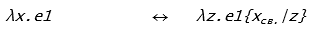

Например:

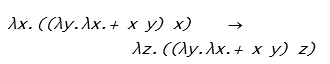

Данное преобразование может работать в обратную сторону, в отличии от $\delta$ и $\beta$ редукций

4. $\eta$ - преобразование - если в выражении E нет свободных вхождений $x$, то функция, применяемая E к x является E



Как бы мы не записывали функцию, то если результат один и тот же при применении к одним и тем же аргументам, то это одна и та же функция.

**Функция определяется результатом своей работы, а не структурой выражения**.

## Примеры преобразований

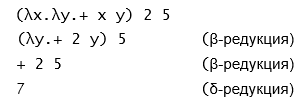

Если результат будет получен, то он всегда будет одним и тем же!

## Ромбическое свойство системы редукций

**Опр**: выражения находится в *нормальной форме*, если к данному лямбда-выражению не применимы $\beta$ и $\delta$ редукции.

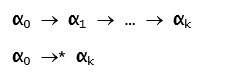

Редукции - есть отношения на множестве формул.

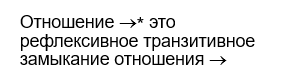

Можно применить редукцию к левому операнду, чтобы получить правое. $\alpha_k$ выводимо из $\alpha_0$ с помощью некоторого количества редукции.

Пусть есть выражение $\alpha_0$ и сделали разную редукцию $\beta_1$ и $\beta_2$. Всегда ли можно свести к одной и той же форме?

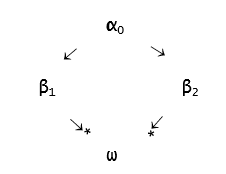

**Теорема (Черча – Россела)**: система преобразований, основанная на применении $\beta$-редукций обладает ромбическим свойством.

**Следствие**: лямбда-выражение не может иметь *более одной нормальной формы.*

**Замечание:** в некоторых случаях применение редукций может, в зависимости от порядка, либо приводить к нормальной форме, либо не приводить к ней.

## Стандартные порядки редукций

**Опр**: если к выражению применима одна из редукций, то 
это выражение называется **Редекс** - `Reducible Expression`. $\beta$-редекс, $\delta$-редекс - можно применить $\beta, \delta$-редукцию.

Выражение может содержать (или не содержать) один или несколько редексов.

Выражение  

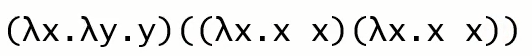

содержит $2$ редекса.

**Опр**: редекс называется **внутренним**, если он полностью содержится внутри другого редекса (в данном случае выражение во вторых скобках).

**Опр**: редекс **внешний**, если он не содержится внутри какого-то редекса, но внутри может содержать какие-то другие редексы (в данном случае всё выражение).

**Опр**: **самый левый (правый)** редекс - текстуально расположен левее (правее) других.

**Опр**: **самый внутренний редекс** - внутри себя не содержит никаких других редексов.

**Опр**: **самый внешний редекс** - не содержится внутри никакого другого редекса.

**Опр:** **Аппликативный порядок редукций** – редукция всегда применяется к самому левому из *самых внутренних редексов*.

**Опр**: **Нормальный порядок редукции** - редукция всегда применяется  к самому левому из *самых внешних* редексов.

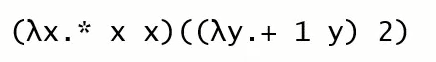

Рассмотрим в аппликативных порядков:

- `(lx. * x x)(+1 2)` - $\beta$
- `(lx. * x x) 3` - $\delta$
- `* 3 3` - $\beta$
- `9` - $\delta$ - нормальная форма

В нормальной форме:

- `* ((ly. + 1 y) 2) ((ly. + 1 y) 2)` - $\beta$
- `* (+ 1 2) ((ly. + 1 y) 2)` - $\beta$
- `* 3 ((ly. + 1 y) 2)` - $\beta$
- `* 3 (+ 1 2)` - $\beta$
- `* 3 3` - $\delta$
- `9` - $\delta$ - нормальная форма

## Сравнение различных порядков редукций

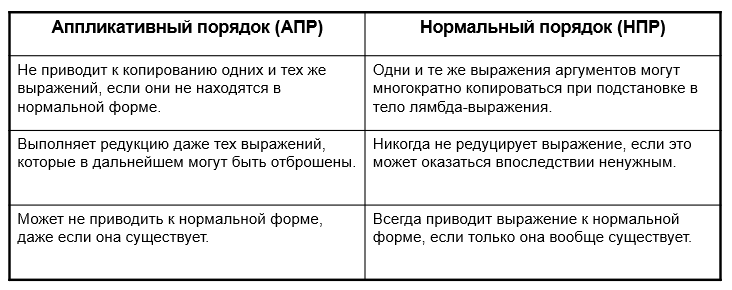

Преобразование выражения к нормальной форме в АПР соответствует энергичному порядку вычислений выражений в языках программирования.

Преобразование выражения к нормальной форме в НПР соответствует вычислениям выражений с подстановкой аргументов «по наименованию».

## Проблема конфликта имён

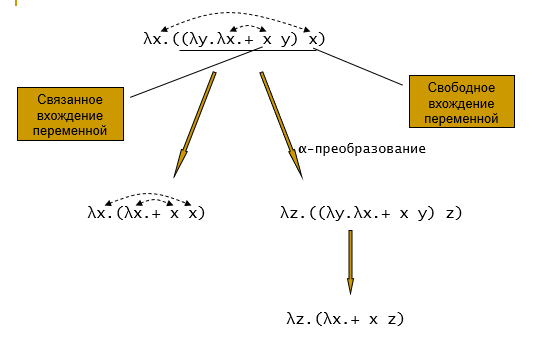

в нормальной форме нет редексов - давайте ослабим это условие - конечное значение может содержать редексы, только смысла в преобразованиях нет.

## Слабая заголовочная нормальная форма (СЗНФ)

**Опр**: выражение находится в СЗНФ, если оно имеет один из следующих видов:

- константа `c`;
- переменная `x`;
- определение функции $\lambda x.E$ - просто лямбда выражение, в теле которого могут быть редексы, но если мы получили такое выражение, то смысла в преобразованиях нет;
- частичное применение функции $P \ E_1 \ E_2 \ \ldots \ E_k$; $P$ - примитивная функция, но аргументов недостаточно - мы будем говорить, что СЗНФ 

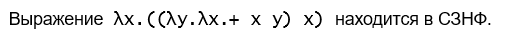

**Замечаени**: Если исходное выражение замкнутое (в нем нет свободных переменных), то при приведении его к СЗНФ не будет возникать никакого конфликат имен, если мы делаем в нормальном порядке.

Вычисления, происходящие при исполнении программы в «ленивых» вычислениях,
соответствуют редукции выражения в НПР до приведения к СЗНФ, дополненнойэффектом «разделения» значений переменных при подстановке аргумента, еще не находящегося в СЗНФ.

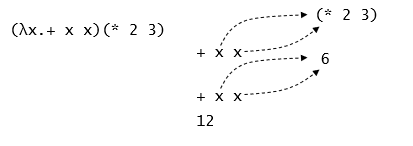

Будем рассматривать на какое значение ссылается - переход по ссылке (в чистом исчислении нет).

## Итоги: механизмы редукций в лямбда-исчислении

1. От способа применения редукций может зависеть окончательный вид выражения, но не его функциональный смысл.

2. Если выражение может быть приведено к нормальной форме, то это может быть сделано с помощью редукций в НПР, возможно, с переименованиями переменных.

3. Аппликативный порядок редукций, приводящий выражение к СЗНФ соответствует энергичной схеме вычислений, принятой в некоторых функциональных языках.

4. «Ленивая» схема вычислений может быть смоделирована приведением выражений к СЗНФ при применении НПР + разделение переменных.